# Chapter 1: Finding words, phrases, names and concepts

---




In [ ]:
import spacy

## 1.1 NLP Object:⭕
##### At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

*  For example, to create an English nlp object, you can import spacy and use the spacy.blank method to create a blank English pipeline. You can use the nlp object like a function to analyze text.

*  It contains all the different components in the pipeline.

*  It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages.

In [ ]:
nlp = spacy.blank('en')

## 1.2 Doc Object : ⭕
* When you process a text with the nlp object, spaCy creates a Doc object *  –short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

*  The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

In [ ]:
doc = nlp('Hi Zaheer')
for token in doc:
  print(token.text)

Hi
Zaheer


## The Token object 🐾

*  Token objects represent the tokens in a document – for example, a word or a punctuation character.

*  To get a token at a specific position, you can index into the doc.

*  Token objects also provide various attributes that let you access more information about the tokens.
*  For example, the .text attribute returns the verbatim token text.
* index from 0 --> n-1


In [ ]:
token = doc[1]

# Get the token text via the .text attribute
print(token.text)

Zaheer


## The Span object ⚗
* A Span object is a slice of the document consisting of one or more tokens.It's only a view of the Doc and doesn't contain any data itself.

* To create a span, you can use Python's slice notation.
* For example, 1:3 will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.

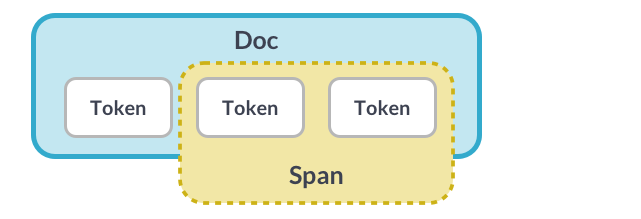

In [ ]:
doc = nlp('namaste Bangalore This is the span object')

span = doc[:1]
print(span.text)

span1 = doc[1:3]
print(span1.text)

namaste
Bangalore This


## Lexical Attributes ⚒️
* Lexical attributes are things about words and tokens that don’t change depending on the context. They are part of the Token object in spacy.
* They tell us things like if a token is a number, a word, a common word, a dot, etc.
* For example, the lexical attribute `like_num` tells us if the token looks like a number.
* Lexical attributes can help us find patterns or get information from a text.

**Some of the lexical attributes in spacy are:**
* `is_alpha:` whether the token consists of alphabetic characters
* `is_digit:` whether the token consists of digits
* `is_punct:` whether the token is a punctuation mark
* `is_space:` whether the token is a whitespace character
* `is_stop:` whether the token is a stop word
* `like_num:` whether the token resembles a number
* `like_url:` whether the token resembles a URL
* `like_email: `whether the token resembles an email address
* `like_num` tells us if the token looks like a number.

In [ ]:
text = "There are 10 people in the room and five of them are women.Today the gold price is $2022 .Date: 12/01/2023"

doc = nlp(text)

print("Index : " , [token.i for token in doc])
print("\n\n")
print("Text : " , [token for token in doc])
print("\n\n")
print("whether the token consists of alphabetic characters ", [token.is_alpha   for token in doc ])
print("\n\n")
print("whether the token consists of digits: ", [token.is_digit   for token in doc ])
print("\n\n")
print("whether the token has punctuation mark : ", [token.is_punct   for token in doc ])
print("\n\n")
print("whether the token is a stop word has space   : ", [token.is_space   for token in doc ])
print("\n\n")
print("whether the token resembles a URL   : ", [token.like_url   for token in doc ])
print("\n\n")
print("whether the token resembles an email address   : ", [token.like_email   for token in doc ])
print("\n\n")
print("whether the token tells us if the token looks like a number : ", [token.like_num   for token in doc ])
print("\n\n")

Index :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]



Text :  [There, are, 10, people, in, the, room, and, five, of, them, are, women, ., Today, the, gold, price, is, $, 2022, .Date, :, 12/01/2023]



whether the token consists of alphabetic characters  [True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, False, False, False]



whether the token consists of digits:  [False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]



whether the token has punctuation mark :  [False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, True, False]



whether the token is a stop word has space   :  [False, False, False, False, False, False, False, False, False, False, False,

# Trained pipelines
## What is a trained pipeline?

* A trained pipeline is a collection of components that work together to process text and produce annotations.
* Each component is powered by a statistical model that is trained on annotated data and can make predictions based on the model’s current weight values.
* For example, a part-of-speech tagger component can predict the grammatical category of each word in a sentence, such as noun, verb or adjective.

spaCy provides several pre-trained pipelines for different languages and genres that you can download and use out-of-the-box. These pipelines are trained on large corpora of text and can handle common NLP tasks with high accuracy.

In [ ]:
# Pipeline Packages
# A package with the label en_core_web_sm
# !python -m spacy download en_core_web_sm

import spacy

nlp = spacy.load("en_core_web_sm")

# Binary weights
# Vocabulary
# Meta information
# Configuration file


*  spaCy provides a number of trained pipeline packages you can download using the spacy download command.
*  For example, the `"en_core_web_sm" ` package is a small English pipeline that supports all core capabilities and is trained on web text.

*  The spacy.loa d method loads a pipeline package by name and returns an nlp object.

*  The package provides the binary weights that enable spaCy to make predictions.

*  It also includes the vocabulary, meta information about the pipeline and the configuration file used to train it.
*  It tells spaCy which language class to use and how to configure the processing pipeline.

## Predicting Part-of-speech Tags


In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("Zaheer ate the pizza")

for token in doc:
  print(token.text  , token.pos_)

Zaheer PROPN
ate VERB
the DET
pizza NOUN


## Predicting Syntactic Dependencies

* In addition to the part-of-speech tags, we can also predict how the words are related.
* For example, whether a word is the subject of the sentence or an object.

* The `.dep_ ` attribute returns the predicted dependency label.

* The `.head `attribute returns the syntactic head token.

```
# This is formatted as code
```


* You can also think of it as the parent token this word is attached to.

* Assigning labels to the words in a sentence that describe their grammatical relationship

In [ ]:
for token in doc :
  print(token.text , token.pos_ , token.head , token.dep_)

Zaheer PROPN ate nsubj
ate VERB ate ROOT
the DET pizza det
pizza NOUN ate dobj


* For example, in the sentence **`“Apple is looking at buying U.K. startup for $1 billion”,`** the word `“Apple”` is the subject of the verb `“is”`, so it gets the label` nsubj `(nominal subject).
* The word `“buying” `is the main action of the sentence, so it gets the label ROOT.
* The word `“startup”` is the object of the verb` “buying”`, so it gets the label `dobj` (direct object).


In [ ]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc :
  print(token.text , token.pos_ , token.dep_ , token.head )

Apple PROPN nsubj looking
is AUX aux looking
looking VERB ROOT looking
at ADP prep looking
buying VERB pcomp at
U.K. PROPN dobj buying
startup NOUN dep looking
for ADP prep startup
$ SYM quantmod billion
1 NUM compound billion
billion NUM pobj for


### Spacy also provides a way to visualize these dependencies using a tree diagram that shows the words and their labels, as well as the direction of the relationship

In [ ]:
# Use displaCy to generate and serve a dependency visualization

from spacy import displacy
displacy.serve(doc, style="dep")

## Predicting Named Entities
* Named entities are `"real world objects"` that are assigned a name – for example, a person, an organization or a country.

* The` doc.ents` property lets you access the named entities predicted by the named entity recognition model.

* It returns an iterator of `Span objects`, so we can print the `entity text` and the `entity label` using the` .label_` attribute.
* In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.

In [ ]:
for token in doc.ents:
  print(token.ents , token.label_)

[Apple] ORG
[U.K.] GPE
[$1 billion] MONEY


Tip: the spacy.explain method
* Get quick definitions of the most common tags and labels.

In [ ]:
print(spacy.explain('GPE'))
print(spacy.explain('ORG'))
print(spacy.explain('NNP'))
print(spacy.explain('dobj'))

Countries, cities, states
Companies, agencies, institutions, etc.
noun, proper singular
direct object


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text =token.text
    token_pos =token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<15}{token_pos:<10}{token_dep:<10}")

It             PRON      nsubj     
’s             VERB      ccomp     
official       NOUN      acomp     
:              PUNCT     punct     
Apple          PROPN     nsubj     
is             AUX       ROOT      
the            DET       det       
first          ADJ       amod      
U.S.           PROPN     nmod      
public         ADJ       amod      
company        NOUN      attr      
to             PART      aux       
reach          VERB      relcl     
a              DET       det       
$              SYM       quantmod  
1              NUM       compound  
trillion       NUM       nummod    
market         NOUN      compound  
value          NOUN      dobj      


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.ents, ent.label_)

[Apple] ORG
[first] ORDINAL
[U.S.] GPE
[$1 trillion] MONEY


**Predicting the NER of the context **

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

# Process the text
doc = nlp(text)

# Iterate over the entities
for i  in doc.ents:
    # Print the entity text and label
    print(i.text, i.label_)

# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print("Missing entity:", iphone_x.text)

Apple ORG
Missing entity: iPhone X


# **Rule-based matching** - (Lets you write rules to find words and phrases in text.)
## **What is rule-based matching?**

>*  Rule-based matching is a technique of text extraction using predefined rules that identify entities according to the pattern.
* For example, you can use rule-based matching to find phone numbers, email addresses, dates, hashtags, or product names in a text.

>*  Rule-based matching is different from regular expressions because it operates over tokens, not characters.
* Tokens are the basic units of a text, such as words, punctuation marks, or numbers.
* Each token has various attributes, such as its text, part-of-speech tag, dependency label, or whether it is a punctuation mark or not.

>* By using token attributes, you can create more flexible and robust patterns that can match complex entities in a text.
* For example, you can create a pattern that matches a token whose text is `“iPhone”` followed by a token whose shape is `“ddd”` (three digits), which would match `“iPhone 12”` or` “iPhone 13`”, but not `“iPhone X`” or “`iPhone case`”.


---
**Rule-based matching can be useful for many tasks, such as:**

>- Extracting specific information from text, such as names, dates, numbers, etc.
- Finding patterns of interest in text, such as opinions, sentiments, emotions, etc.
Labeling or linking entities in text, such as persons, organizations, locations, etc.
>- Enhancing or modifying existing annotations in text, such as merging spans, adding custom labels, etc.
---

## Why not just regular expressions ⁉️
>- Rule-based matching operates on tokens and their attributes, not just characters.
- This means you can match words and phrases based on their linguistic features, such as **part-of-speech tags, dependency labels, lemmas, etc**.
- For example, you can match a verb followed by a noun, regardless of their exact text.
- Rule-based matching gives you access to the tokens and their relationships within the document.
- This means you can easily analyze and manipulate the matched spans, such as merging them into single tokens or adding them to the named entities in `doc.ents.`
- Rule-based matching lets you use operators to modify how often a token should be matched.
- This makes it easier to create flexible and complex patterns that can match optional or repeated tokens.
- For example, you can match a token whose text is “iPhone” followed by an optional token whose shape is “dd” (two digits), which would match “iPhone”, “iPhone 12”, “iPhone 13”, etc.
- Rule-based matching allows you to associate patterns with entity IDs, to enable some basic entity linking or disambiguation.
- For example, you can match a token whose text is `“Google”` and assign it an entity ID of` “ORG:Google”,` which would link it to a specific organization.

Compared to regular expressions, the matcher works with Doc and Token objects instead of only strings.

It's also more flexible: you can search for texts but also other lexical attributes.

You can even write rules that use a model's predictions.

For example, find the word "duck" only if it's a verb, not a noun.



---







## **How to use rule-based matching with spaCy?**

- spaCy is a popular and powerful library for natural language processing (NLP) in Python.
- It provides various components and tools for working with text data, such as tokenization, lemmatization, part-of-speech tagging, dependency parsing, named entity recognition, etc.

spaCy also features a rule-matching engine called the Matcher that lets you find words and phrases using rules describing their token attributes. The Matcher accepts a list of dictionaries as patterns, where each dictionary represents one token and its attributes.
- **The available token attributes for rule-based matching are:**
* `ORTH`: The exact verbatim text of a token.
* TEXT: The exact verbatim text of a token.
* NORM: The normalized form of the token text.
* LOWER: The lowercase form of the token text.
* LENGTH: The length of the token text.
* IS_ALPHA, IS_ASCII, IS_DIGIT: Token text consists of alphabetic characters, ASCII characters, digits.
* IS_LOWER, IS_UPPER, IS_TITLE: Token text is in lowercase, uppercase, titlecase.
* IS_PUNCT, IS_SPACE, IS_STOP: Token is punctuation, whitespace, stop word.
* IS_SENT_START: Token is start of sentence.
* LIKE_NUM, LIKE_URL, LIKE_EMAIL: Token text resembles a number, URL, email.
* SPACY: Token has a trailing space.
* POS: The token’s simple part-of-speech tag.
* TAG: The token’s extended part-of-speech tag.
* MORPH: The token’s morphological analysis.
* DEP: The token’s dependency label.
* LEMMA: The token’s lemma.
* SHAPE: The token’s shape.
* ENT_TYPE: The token’s entity label.
* ENT_IOB: The IOB part of the token’s entity tag.
* ENT_ID: The token’s entity ID (ent_id).
* ENT_KB_ID: The token’s entity knowledge base ID (ent_kb_id).
* _: Properties in custom extension attributes.

You can also use operators or quantifiers to define how often a token pattern should be matched:

* !: Negate the pattern, by requiring it to match exactly 0 times.
* ?: Make the pattern optional, by allowing it to match 0 or 1 times.
* +: Require the pattern to match 1 or more times.
* *: Allow the pattern to match 0 or more times.
* {n}: Require the pattern to match exactly n times.
* {n,m}: Require the pattern to match at least n but not more than m times.
* {n,}: Require the pattern to match at least n times.
* {m}: Require the pattern to match at most m times.

---
## To use the Matcher with spaCy :

1. Import spacy and Matcher from `spacy.matcher`
2. Load a language model with `spacy.load`.
3. Initialize the `Matcher` with the `vocab` of the language model.
4. Add patterns to the Matcher with `matcher.add`.
5. Apply the Matcher to a Doc object with matcher(doc).
6. Iterate over the matches and access the matched spans.

# Match patterns ♈

## **What are match patterns?**
>* Match patterns are lists of dictionaries that describe the tokens you want to find in a text.
- Each dictionary represents one token and its attributes, such as its text, part-of-speech tag, dependency label, or whether it is a punctuation mark or not.

By using token attributes, you can create flexible and robust patterns that can match complex words and phrases in a text.
For example, you can create a pattern that matches a token whose text is “iPhone” followed by an optional token whose shape is “dd” (two digits), which would match “iPhone”, “iPhone 12”, “iPhone 13”, etc.


---


Lists of dictionaries, one per token

1. **Match exact token texts**
> `[{"TEXT": "iPhone"}, {"TEXT": "X"}]`

2. **Match lexical attributes**
> `[{"LOWER": "iphone"}, {"LOWER": "x"}]`

3. **Match any token attributes**
> `[{"LEMMA": "buy"}, {"POS": "NOUN"}]`

We can even write patterns using attributes predicted by a model. Here, we're matching a token with the lemma "buy", plus a noun. The lemma is the base form, so this pattern would match phrases like "buying milk" or "bought flowers".

---





# **How do match patterns work?**

>- To use match patterns, you need to import the `Matcher` from `spacy.matcher` and initialize it with a `vocab`.
- The `vocab` is a collection of symbols and strings that spaCy uses internally.
- You can access the `vocab` of a `Doc` object by using its `.vocab ` attribute.


In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')

# initialize the Matcher with the vocab
matcher = Matcher(doc.vocab)

📝 Next, you need to define a pattern as a list of dictionaries. Each dictionary represents one token and its attributes.
- **You can use various attributes to define your pattern, such as:**

>🔹 "`TEXT`": the exact text of the token

> 🔹 "`LOWER`": the lowercase form of the token text

> 🔹 "`LENGTH`": the length of the token text

> 🔹 "`IS_DIGIT`": whether the token text consists of digits

> 🔹 "`IS_PUNCT`": whether the token is a punctuation mark

> 🔹 "`IS_SPACE`": whether the token is a whitespace character

> 🔹 "`SHAPE`": the abstract shape of the token text, using
> - "`d`" for digit,
- "`x`" for lowercase letter,
- "`X`" for uppercase letter, and
- `"."` for any other character

> 🔹 "`POS`": the part-of-speech tag of the token

> 🔹 "`TAG`": the fine-grained part-of-speech tag of the token

> 🔹 " `DEP`": the dependency label of the token

> 🔹 "`LEMMA`": the base form of the token text


For example, to create a pattern that matches “iPhone X”, you can use:

In [ ]:
# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]



-  To add the pattern to the Matcher, you need to call its `.add()` method with an `ID `and the `pattern`.
- The `ID` can be any string that identifies your pattern.
- You can also pass an optional callback function that will be executed when a match is found.

In [ ]:
matcher.add("IPHONE_PATTERN", [pattern])

To apply the `Matcher` to a `Doc` object, you simply need to call it with the `Doc` as an argument.
- **It will return a list of tuples, where each tuple consists of:**

> - The match ID (the hash value of the string ID)
- The start index of the matched span
- The end index of the matched span

In [ ]:

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc )

matches





[(9528407286733565721, 1, 3)]

# Using the Matcher - 1

In [ ]:

import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a pipeline and create the nlp object
nlp = spacy.load("en_core_web_sm")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern])

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)
matcher

To use a pattern, we first import the matcher from spacy.matcher.

We also load a pipeline and create the nlp object.

The matcher is initialized with the shared vocabulary, nlp.vocab. You'll learn more about this later – for now, just remember to always pass it in.

The matcher.add method lets you add a pattern. The first argument is a unique ID to identify which pattern was matched. The second argument is a list of patterns.

To match the pattern on a text, we can call the matcher on any doc.

This will return the matches.

# Using the Matcher - 2


In [ ]:
# Call the matcher on the doc
doc = nlp("Upcoming iPhone X release date leaked")
matches = matcher(doc)

# Iterate over the matches
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


- `match_id`: hash value of the pattern name
- `start`: start index of matched span
- `end:` end index of matched span

When you call the matcher on a doc, it returns a list of tuples.

Each tuple consists of three values: the match ID, the start index and the end index of the matched span.

This means we can iterate over the matches and create a Span object: a slice of the doc at the start and end index.

In [ ]:
# Example 1

import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

doc = nlp("I bought an iPhone 13 and iphone 14 and iphone X yesterday.")

patterns = [{'T'}]

15329811787164753587 pattern 0 3 Hello, world


In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


# **Exercise : Token-based matching in spacy**

In [ ]:
# Exercise 1:
# Text: "I have a cat and a dog. They are my beloved pets."
# Question: Write a pattern that matches tokens with the exact text "cat" or "dog".

import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)

doc = nlp("I have a cat and a dog. They are my beloved pets.")

pattern = [{"LOWER":'dog'}]

matcher.add('Exercise-1' , patterns=[pattern])

matches = matcher(doc)

for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(match_id, string_id, start, end, span.text)



17467382244851533168 Exercise-1 6 7 dog


In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", [pattern])

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)


15578876784678163569 HelloWorld 0 3 Hello, world


**Fuzzy matching**

In [ ]:
from pygments import style
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

ruler = nlp.add_pipe('entity_ruler')
pattern = {"pattern": [{"LOWER":{'FUZZY' : 'India'}}] , 'label' :  'Country'}

ruler.add_patterns([pattern])

doc = nlp("We are Indians , and I am from India .People sometimes used to Hindiya or Bharath or Indani.")

displacy.render(doc , style='ent', jupyter=True)


In [ ]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

**Adding on_match rules**

In [ ]:
from spacy.lang.en import English
from spacy.matcher import Matcher
from spacy.tokens import Span

nlp = English()
matcher = Matcher(nlp.vocab)

def add_event_ent(matcher, doc, i, matches):
    # Get the current match and create tuple of entity label, start and end.
    # Append entity to the doc's entity. (Don't overwrite doc.ents!)
    match_id, start, end = matches[i]
    entity = Span(doc, start, end, label="EVENT")
    doc.ents += (entity,)
    print(entity.text)

pattern = [{"ORTH": "Google"}, {"ORTH": "I"}, {"ORTH": "/"}, {"ORTH": "O"}]
matcher.add("GoogleIO", [pattern], on_match=add_event_ent)
doc = nlp("This is a text about Google I/O")
matches = matcher(doc)

Google I/O


**SPAN**

In [ ]:

doc = nlp("Give it back ! He pleaded.")
span = doc[1:4]
assert span[1].text == "back"
span

it back !

In [ ]:
doc = nlp("Give it back! He pleaded.")
span = doc[1:4]
assert span[1:3].text == "back!"
span

it back!

In [ ]:
doc = nlp("Give it back! He pleaded.")
span = doc[1:4]
assert [t.text for t in span] == ["it", "back", "!"]
span

it back!

In [ ]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span

nlp = spacy.blank("en")
matcher = Matcher(nlp.vocab)
matcher.add("PERSON", [[{"lower": "barack"}, {"lower": "obama"}]])
doc = nlp("Barack Obama was the 44th president of the United States")

# 1. Return (match_id, start, end) tuples
matches = matcher(doc)
# for match_id, start, end in matches:
    # Create the matched span and assign the match_id as a label
    # span = Span(doc, start, end, label=match_id)
    # print(span.text, span.label_)

# 2. Return Span objects directly
matches = matcher(doc, as_spans=True)
for span in matches:
    print(span.text, span.label_)


Barack Obama PERSON


In [ ]:
import spacy
from spacy import displacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
matched_sents = []  # Collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    span = doc[start:end]  # Matched span
    sent = span.sent  # Sentence containing matched span
    # Append mock entity for match in displaCy style to matched_sents
    # get the match span by ofsetting the start and end of the span with the
    # start and end of the sentence in the doc
    match_ents = [{
        "start": span.start_char - sent.start_char,
        "end": span.end_char - sent.start_char,
        "label": "MATCH",
    }]
    matched_sents.append({"text": sent.text, "ents": match_ents})

pattern = [{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"},
           {"POS": "ADJ"}]
matcher.add("FacebookIs", [pattern], on_match=collect_sents)  # add pattern
doc = nlp("I'd say that Facebook is evil. – Facebook is pretty cool, right?")
matches = matcher(doc)

# Serve visualization of sentences containing match with displaCy
# set manual=True to make displaCy render straight from a dictionary
# (if you're not running the code within a Jupyer environment, you can
# use displacy.serve instead)
displacy.render(matched_sents, style="ent",manual = True)

'<div class="entities" style="line-height: 2.5; direction: ltr">I\'d say that \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Facebook is evil\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MATCH</span>\n</mark>\n.</div>\n\n<div class="entities" style="line-height: 2.5; direction: ltr">– \n<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">\n    Facebook is pretty cool\n    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MATCH</span>\n</mark>\n, right?</div>'

<div class="entities" style="line-height: 2.5; direction: ltr">I'd say that
<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">
    Facebook is evil
    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MATCH</span>
</mark>
.</div>

<div class="entities" style="line-height: 2.5; direction: ltr">–
<mark class="entity" style="background: #ddd; padding: 0.45em 0.6em; margin: 0 0.25em; line-height: 1; border-radius: 0.35em;">
    Facebook is pretty cool
    <span style="font-size: 0.8em; font-weight: bold; line-height: 1; border-radius: 0.35em; vertical-align: middle; margin-left: 0.5rem">MATCH</span>
</mark>
, right?</div>

**Example: Phone numbers**

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_sm')
matcher = Matcher(nlp.vocab)
doc = nlp("Hello , Call me - +91 9353333151 or (123) 4567 8901 or (123) 4567-8901. ")

pattern = [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "dddd"},
 {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]


matcher.add('phn',[pattern])
matches = matcher(doc)
for match_id , start ,end in matches:
  span = doc[start:end]
  print(span.text)


(123) 4567 8901
(123) 4567-8901


## **Hashtags and emoji on social media**
- Social media posts, especially tweets, can be difficult to work with.
- They’re very short and often contain various emoji and hashtags. By only looking at the plain text, you’ll lose a lot of valuable semantic information.
- Let’s say you’ve extracted a large sample of social media posts on a specific topic, for example posts mentioning a brand name or product.
- As the first step of your data exploration, you want to filter out posts containing certain emoji and use them to assign a general sentiment score, based on whether the expressed emotion is positive or negative, e.g. 😀 or 😞.
- You also want to find, merge and label hashtags like `#MondayMotivation`, to be able to ignore or analyze them later.

**NOTE ON SENTIMENT ANALYSIS**

- Ultimately, sentiment analysis is not always *that* easy. In addition to the emoji, you’ll also want to take specific words into account and check the `subtree` for intensifiers like “very”, to increase the sentiment score.
- At some point, you might also want to train a sentiment model.
- However, the approach described in this example is very useful for **bootstrapping rules to collect training data**.
- It’s also an incredibly fast way to gather first insights into your data – with about 1 million tweets, you’d be looking at a processing time of **under 1 minute**.

By default, spaCy’s tokenizer will split emoji into separate tokens. This means that you can create a pattern for one or more emoji tokens. Valid hashtags usually consist of a `#`, plus a sequence of ASCII characters with no whitespace, making them easy to match as well.

In [ ]:
from spacy.lang.en import English
from spacy.matcher import Matcher

nlp = English()  # We only want the tokenizer, so no need to load a pipeline
matcher = Matcher(nlp.vocab)

pos_emoji = ["😀", "😃", "😂", "🤣", "😊", "😍"]  # Positive emoji
neg_emoji = ["😞", "😠", "😩", "😢", "😭", "😒"]  # Negative emoji

# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

# Function to label the sentiment
def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == "HAPPY":  # Don't forget to get string!
        doc.sentiment += 0.1  # Add 0.1 for positive sentiment
    elif doc.vocab.strings[match_id] == "SAD":
        doc.sentiment -= 0.1  # Subtract 0.1 for negative sentiment

matcher.add("HAPPY", pos_patterns, on_match=label_sentiment)  # Add positive pattern
matcher.add("SAD", neg_patterns, on_match=label_sentiment)  # Add negative pattern

# Add pattern for valid hashtag, i.e. '#' plus any ASCII token
matcher.add("HASHTAG", [[{"ORTH": "#"}, {"IS_ASCII": True}]])

doc = nlp("Hello world 😀 #MondayMotivation")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)


HAPPY 😀
HASHTAG #MondayMotivation


- With a library like Emojipedia, we can also retrieve a short description for each emoji – for example, `😍`‘s official title is `“Smiling Face With Heart-Eyes”`.
- Assigning it to a custom attribute on the emoji span will make it available as `span._.emoji_desc`.

In [ ]:
!pip install emojipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from emojipedia import Emojipedia
from spacy.tokens import Span  # Get the global Span object

Span.set_extension("emoji_desc", default=None)  # Register the custom attribute

def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == "HAPPY":  # Don't forget to get string!
        doc.sentiment += 0.1  # Add 0.1 for positive sentiment
    elif doc.vocab.strings[match_id] == "SAD":
        doc.sentiment -= 0.1  # Subtract 0.1 for negative sentiment
    span = doc[start:end]
    emoji = Emojipedia.search(span[0].text)  # Get data for emoji
    span._.emoji_desc = emoji.title  # Assign emoji description



# **PHRASE MATCHER** ✈
<aside>
📌 PhraseMatcher is a tool that lets you find words and phrases in text based on patterns.

**A pattern is a way of describing what kind of words or phrases you want to find.**

</aside>

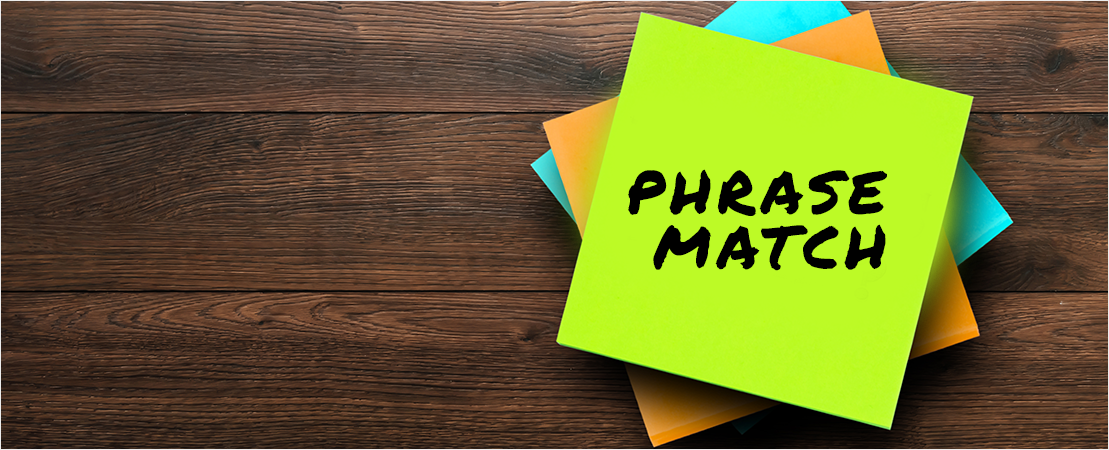

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load('en_core_web_sm')
matcher = PhraseMatcher(nlp.vocab)

animals = ['cat' , 'dog' , 'elephant' , 'horse' , 'loin','tiger' ,'giant sea spiders' , 'tree kangaroos ']

pattern = [nlp.make_doc(text) for text in animals]
matcher.add('AnimalList' , pattern)

text = "tree kangaroos and giant sea spiders are two of Australia's most unusual animals"
doc = nlp(text)

matches = matcher(doc)

for match_id , start , end in matches:
  span = doc[start:end]
  print(span.text)
matches


tree kangaroos
giant sea spiders


[(4543429605269734548, 0, 2), (4543429605269734548, 3, 6)]

Ip address Matching

In [ ]:
from spacy.lang.en import English
from spacy.matcher import PhraseMatcher

nlp = English()
matcher = PhraseMatcher(nlp.vocab, attr="SHAPE")
matcher.add("IP", [nlp("127.0.0.1"), nlp("127.127.0.0")])

doc = nlp("Often the router will have an IP address such as 192.168.1.1 or 192.168.2.1.")
for match_id, start, end in matcher(doc):
    print("Matched based on token shape:", doc[start:end])

Matched based on token shape: 192.168.1.1
Matched based on token shape: 192.168.2.1


Using Scapped data

In [ ]:
import bs4 as bs
import urllib.request
import re
import nltk

scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text


processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)



import spacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(nlp.vocab)

phrases = ['machine learning', 'robots', 'intelligent agents']

patterns = [nlp.make_doc(text) for text in phrases]
phrase_matcher.add('AI', None, *patterns)

sentence = nlp (processed_article)

matched_phrases = phrase_matcher(sentence)
for match_id, start, end in matched_phrases:
    string_id = nlp.vocab.strings[match_id]
    span = sentence[start:end]
    print(match_id, string_id, start, end, span.text)

5530044837203964789 AI 242 244 machine learning
5530044837203964789 AI 1208 1209 robots
5530044837203964789 AI 1345 1347 machine learning
5530044837203964789 AI 1960 1962 machine learning
5530044837203964789 AI 3476 3478 machine learning
5530044837203964789 AI 3490 3492 machine learning
5530044837203964789 AI 4805 4807 machine learning
5530044837203964789 AI 4827 4829 machine learning
5530044837203964789 AI 5257 5259 machine learning
5530044837203964789 AI 5284 5286 machine learning
5530044837203964789 AI 6505 6506 robots
5530044837203964789 AI 6704 6706 machine learning
5530044837203964789 AI 6783 6784 robots
5530044837203964789 AI 6784 6786 machine learning
5530044837203964789 AI 7216 7217 robots
5530044837203964789 AI 7976 7977 robots


text = "Apple, Google, and Microsoft are leading technology companies."
Check for company names

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
nlp = spacy.load('en_core_web_sm')
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')

com = ['Apple' , 'Google' ,'Microsoft', 'nvidia']
pattern = [nlp.make_doc(text) for text in com]
matcher.add('Companies', pattern)

text = "Apple , Google , and microsoft are leading technology companies."
doc = nlp(text)


matches = matcher(doc)

for id , strt , end in matches :
  span = doc[strt:end].text
  print(f"matched : {span}")

matches

matched : Apple
matched : Google
matched : microsoft


[(6335807596707871007, 0, 1),
 (6335807596707871007, 2, 3),
 (6335807596707871007, 5, 6)]

**Identifying** programming languages
text = "Python is a versatile language, and it is widely used in the industry."


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher
nlp = spacy.load('en_core_web_sm')
matcher = PhraseMatcher(nlp.vocab)

pl = ['Python' ,'Java' ,'C++' , 'C']
pattern = [nlp(i) for i in pl]
matcher.add("Programming" , pattern)

text = "Python is a versatile language, and it is widely used in the industry.Java"
doc = nlp(text)

matches = matcher(doc)
for id , strt , end in matches :
  span = doc[strt:end].text
  print(f"matched : {span}")

matched : Python
matched : Java


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)

# Define product names to match
product_names = ["iPhone", "MacBook Pro", "PlayStation", "Samsung Galaxy"]

# Convert product names to patterns
patterns = [nlp(name) for name in product_names]
matcher.add("ProductNames", None, *patterns)

# Text to search for product names
text = "I just bought a new iPhone and MacBook Pro. The Samsung Galaxy is also a great device."

# Process the text with the PhraseMatcher
doc = nlp(text)
matches = matcher(doc)

# Print the matched product names
for match_id, start, end in matches:
    matched_text = doc[start:end].text
    print(f"Matched: {matched_text}")


Matched: iPhone
Matched: MacBook Pro
Matched: Samsung Galaxy


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)

# Define city names to match
city_names = ["London", "Paris", "New York", "Tokyo"]

# Convert city names to patterns
patterns = [nlp(name) for name in city_names]
matcher.add("CityNames", None, *patterns)

# Text to search for city names
text = "I traveled from New York to Paris, and then to Tokyo. London is my next destination."

# Process the text with the PhraseMatcher
doc = nlp(text)
matches = matcher(doc)

# Print the matched city names
for match_id, start, end in matches:
    matched_text = doc[start:end].text
    print(f"Matched: {matched_text}")


Matched: New York
Matched: Paris
Matched: Tokyo
Matched: London


 **Handling case-insensitive matches**


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab, attr="LOWER")

# Define case-insensitive phrases
phrases = ["New York", "Los Angeles", "San Francisco"]

# Convert phrases to patterns
patterns = [nlp.make_doc(phrase) for phrase in phrases]
matcher.add("CaseInsensitive", None, *patterns)

# Text to search for case-insensitive matches
text = "I visited new york, Los angeles, and san francisco."

# Process the text with the PhraseMatcher
doc = nlp(text)
matches = matcher(doc)

# Print the case-insensitive matches
for match_id, start, end in matches:
    matched_text = doc[start:end].text
    print(f"Matched: {matched_text}")


Matched: new york
Matched: Los angeles
Matched: san francisco


In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab, attr="IS_PUNCT")

phrases = ['cat' , 'dog']
pattern = [nlp(i) for i in phrases]
matcher.add('POS' ,pattern)
text = "I visited new york, Los angeles, and san francisco and i saw their beautiful cat and dog that was fighting with each other "

# Process the text with the PhraseMatcher
doc = nlp(text)
matches = matcher(doc )
for match_id, start, end in matches:
    matched_text = doc[start:end].text
    print(f"Matched: {matched_text}")



Matched: I
Matched: visited
Matched: new
Matched: york
Matched: Los
Matched: angeles
Matched: and
Matched: san
Matched: francisco
Matched: and
Matched: i
Matched: saw
Matched: their
Matched: beautiful
Matched: cat
Matched: and
Matched: dog
Matched: that
Matched: was
Matched: fighting
Matched: with
Matched: each
Matched: other


# **Dependency Parsing**

In [ ]:
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

doc = nlp("Zaheeer is working on a project")
for token in doc :
  print(token.text , token.dep_ , token.head.text)

displacy.render(doc , style='dep')

In [ ]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')
doc = nlp("He loved mustang gt")

for token in doc:
  print(token.text , token.pos_ , token.dep_ , token.head.text ,[child for child in token.children])

displacy.render(doc , style='dep')

He PRON nsubj loved []
loved VERB ROOT loved [He, gt]
mustang PROPN compound gt []
gt PROPN dobj loved [mustang]


'<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="e02f452ec5954d2c84aee689f6e1a32f-0" class="displacy" width="750" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="50">He</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PRON</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="225">loved</tspan>\n    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">VERB</tspan>\n</text>\n\n<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">\n    <tspan class="displacy-word" fill="currentColor" x="400">mustang</tspan>\n    <tspan class="displacy-

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="1a9afa07eb5147989ff4a06327cec9e4-0" class="displacy" width="1100" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">
<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="50">Zaheeer</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="225">is</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">AUX</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="400">working</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="400">VERB</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="575">on</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="575">ADP</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="750">a</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="750">DET</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="925">project</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="925">NOUN</tspan>
</text>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-0" stroke-width="2px" d="M70,177.0 C70,2.0 400.0,2.0 400.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-0" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">nsubj</textPath>
    </text>
    <path class="displacy-arrowhead" d="M70,179.0 L62,167.0 78,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-1" stroke-width="2px" d="M245,177.0 C245,89.5 395.0,89.5 395.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-1" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">aux</textPath>
    </text>
    <path class="displacy-arrowhead" d="M245,179.0 L237,167.0 253,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-2" stroke-width="2px" d="M420,177.0 C420,89.5 570.0,89.5 570.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-2" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">prep</textPath>
    </text>
    <path class="displacy-arrowhead" d="M570.0,179.0 L578.0,167.0 562.0,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-3" stroke-width="2px" d="M770,177.0 C770,89.5 920.0,89.5 920.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-3" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">det</textPath>
    </text>
    <path class="displacy-arrowhead" d="M770,179.0 L762,167.0 778,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-4" stroke-width="2px" d="M595,177.0 C595,2.0 925.0,2.0 925.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-4" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">pobj</textPath>
    </text>
    <path class="displacy-arrowhead" d="M925.0,179.0 L933.0,167.0 917.0,167.0" fill="currentColor"/>
</g>
</svg>

<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" xml:lang="en" id="1a9afa07eb5147989ff4a06327cec9e4-0" class="displacy" width="1100" height="312.0" direction="ltr" style="max-width: none; height: 312.0px; color: #000000; background: #ffffff; font-family: Arial; direction: ltr">
<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="50">Zaheeer</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="50">PROPN</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="225">is</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="225">AUX</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="400">working</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="400">VERB</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="575">on</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="575">ADP</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="750">a</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="750">DET</tspan>
</text>

<text class="displacy-token" fill="currentColor" text-anchor="middle" y="222.0">
    <tspan class="displacy-word" fill="currentColor" x="925">project</tspan>
    <tspan class="displacy-tag" dy="2em" fill="currentColor" x="925">NOUN</tspan>
</text>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-0" stroke-width="2px" d="M70,177.0 C70,2.0 400.0,2.0 400.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-0" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">nsubj</textPath>
    </text>
    <path class="displacy-arrowhead" d="M70,179.0 L62,167.0 78,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-1" stroke-width="2px" d="M245,177.0 C245,89.5 395.0,89.5 395.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-1" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">aux</textPath>
    </text>
    <path class="displacy-arrowhead" d="M245,179.0 L237,167.0 253,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-2" stroke-width="2px" d="M420,177.0 C420,89.5 570.0,89.5 570.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-2" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">prep</textPath>
    </text>
    <path class="displacy-arrowhead" d="M570.0,179.0 L578.0,167.0 562.0,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-3" stroke-width="2px" d="M770,177.0 C770,89.5 920.0,89.5 920.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-3" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">det</textPath>
    </text>
    <path class="displacy-arrowhead" d="M770,179.0 L762,167.0 778,167.0" fill="currentColor"/>
</g>

<g class="displacy-arrow">
    <path class="displacy-arc" id="arrow-1a9afa07eb5147989ff4a06327cec9e4-0-4" stroke-width="2px" d="M595,177.0 C595,2.0 925.0,2.0 925.0,177.0" fill="none" stroke="currentColor"/>
    <text dy="1.25em" style="font-size: 0.8em; letter-spacing: 1px">
        <textPath xlink:href="#arrow-1a9afa07eb5147989ff4a06327cec9e4-0-4" class="displacy-label" startOffset="50%" side="left" fill="currentColor" text-anchor="middle">pobj</textPath>
    </text>
    <path class="displacy-arrowhead" d="M925.0,179.0 L933.0,167.0 917.0,167.0" fill="currentColor"/>
</g>
</svg>